In [6]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
# Define the image size
IMAGE_SIZE = [224, 224]

In [9]:
# Set the paths to the training and validation data
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [10]:
# Load the DenseNet121 model with local weights file
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='/Users/hemu/Desktop/Updated_work_on_Deep_Learning/Research_work_on_Deep_Learning/Pneumonia/chest_xray/Pneumonia_models/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)

In [37]:
# Freeze all layers in the DenseNet model
for layer in densenet.layers:
    layer.trainable = False


In [38]:
# Get the folders in the training data directory
folders = glob('chest_xray/train/*')

In [39]:
# Add a flatten layer and a dense layer to the DenseNet model
x = Flatten()(densenet.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [40]:
# Create a model object
model = Model(inputs=densenet.input, outputs=prediction)

In [41]:
# View the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_4 (ZeroPadd  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_4[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

In [42]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [43]:
# Create image data generators for the training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
# Generate training and validation data
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size=(224, 224),
                                                 batch_size=10,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size=(224, 224),
                                            batch_size=10,
                                            class_mode='categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [45]:
# Train the model
model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=1,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

522/522 [==============================] - 219s 413ms/step - loss: 1.2423 - accuracy: 0.9195 - val_loss: 1.9956 - val_accuracy: 0.9038


In [46]:
img = image.load_img('chest_xray/test/Normal/IM-0011-0001.jpeg', target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

img_data = preprocess_input(x)
classes = model.predict(img_data)
result = int(classes[0][0])
if result == 0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

1/1 [==============================] - 1s 1s/step
Person is Affected By PNEUMONIA


In [47]:
# Initialize an empty list to store true and predicted labels
true_labels = []
predicted_labels = []

In [48]:
# Loop through the test set and predict labels
for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)
    # Convert one-hot encoded labels to class labels
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))


1/1 [==============================] - 0s 172ms/step


In [49]:
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

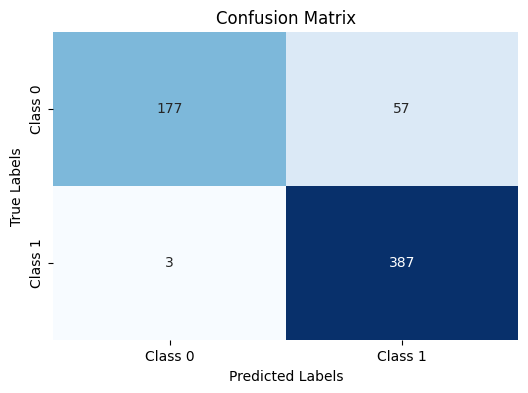

In [50]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.yticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.show()

In [51]:
# Calculate and display accuracy, precision, recall, and F1-score
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy   :", accuracy)
precision = precision_score(true_labels, predicted_labels)
print("Precision :", precision)
recall = recall_score(true_labels, predicted_labels)
print("Recall    :", recall)
F1_score = f1_score(true_labels, predicted_labels)
print("F1-score  :", F1_score)

Accuracy   : 0.9038461538461539
Precision : 0.8716216216216216
Recall    : 0.9923076923076923
F1-score  : 0.9280575539568345


In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Define the image size
IMAGE_SIZE = [224, 224]

In [4]:
# Set the paths to the training and validation data
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [5]:
# Load the DenseNet121 model with local weights file
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='/Users/hemu/Desktop/Updated_work_on_Deep_Learning/Research_work_on_Deep_Learning/Pneumonia/chest_xray/Pneumonia_models/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)

In [6]:
# Freeze all layers in the DenseNet model
for layer in densenet.layers:
    layer.trainable = False

# Get the folders in the training data directory
folders = glob('chest_xray/train/*')

In [7]:
# Add additional layers to the model
x = Flatten()(densenet.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [8]:
# Create a model object
model = Model(inputs=densenet.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  


 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']          
 on)                                                                                              
                                                                                                  
 conv1/relu (Activation)     (None, 112, 112, 64)         0         ['conv1/bn[0][0]']            
                                                                                                  
 zero_padding2d_1 (ZeroPadd  (None, 114, 114, 64)         0         ['conv1/relu[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 pool1 (Ma

In [9]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=0.0001),  # You can adjust the learning rate
    metrics=['accuracy']
)


In [10]:
# Create image data generators for the training and validation data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)


In [11]:
batch_size=32

In [12]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(train_path,
                                                target_size=IMAGE_SIZE,
                                                batch_size=batch_size,
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=IMAGE_SIZE,
                                            batch_size=batch_size,
                                            class_mode='categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
# Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [15]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,  # Adjust the number of epochs as needed
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[early_stopping]
)


Epoch 1/20
163/163 [==============================] - 203s 1s/step - loss: 0.1902 - accuracy: 0.9270 - val_loss: 0.2860 - val_accuracy: 0.8862
Epoch 2/20
163/163 [==============================] - 217s 1s/step - loss: 0.1798 - accuracy: 0.9270 - val_loss: 0.2695 - val_accuracy: 0.9135
Epoch 3/20
163/163 [==============================] - 230s 1s/step - loss: 0.1650 - accuracy: 0.9337 - val_loss: 0.2715 - val_accuracy: 0.8974
Epoch 4/20
163/163 [==============================] - 234s 1s/step - loss: 0.1627 - accuracy: 0.9302 - val_loss: 0.3787 - val_accuracy: 0.8638
Epoch 5/20
163/163 [==============================] - 251s 2s/step - loss: 0.1548 - accuracy: 0.9385 - val_loss: 0.2925 - val_accuracy: 0.9135
Epoch 6/20
163/163 [==============================] - 253s 2s/step - loss: 0.1632 - accuracy: 0.9358 - val_loss: 0.4233 - val_accuracy: 0.8910
Epoch 7/20
163/163 [==============================] - 257s 2s/step - loss: 0.1612 - accuracy: 0.9387 - val_loss: 0.3037 - val_accuracy: 0.9135

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


20/20 [==============================] - 19s 939ms/step - loss: 0.2695 - accuracy: 0.9135
Test Loss: 0.26951661705970764
Test Accuracy: 0.9134615659713745


In [17]:
# Make predictions on a sample image
sample_image_path = 'chest_xray/test/Normal/IM-0011-0001.jpeg'
img = keras.preprocessing.image.load_img(sample_image_path, target_size=IMAGE_SIZE)
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
classes = model.predict(x)
result = int(np.argmax(classes, axis=1)[0])


1/1 [==============================] - 1s 1s/step


In [18]:
if result == 0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")


Person is Affected By PNEUMONIA


In [19]:
# Initialize an empty list to store true and predicted labels
true_labels = []
predicted_labels = []


In [20]:
# Loop through the test set and predict labels
for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)
    # Convert one-hot encoded labels to class labels
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))


1/1 [==============================] - 1s 534ms/step


In [21]:
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


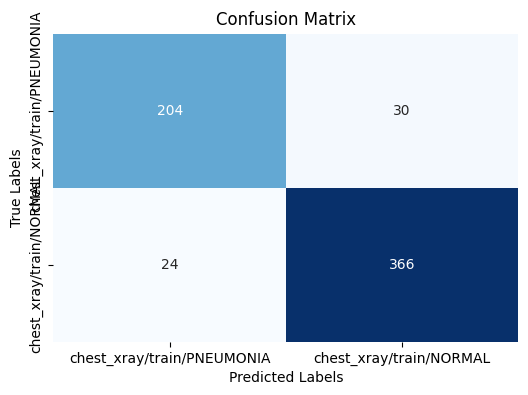

In [22]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(conf_matrix)) + 0.5, folders)
plt.yticks(np.arange(len(conf_matrix)) + 0.5, folders)
plt.show()

In [23]:
# Calculate and display accuracy, precision, recall, and F1-score
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)
recall = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall)
f1_score = f1_score(true_labels, predicted_labels, average='weighted')
print("F1-score:", f1_score)

Accuracy: 0.9134615384615384
Precision: 0.9131778309409889
Recall: 0.9134615384615384
F1-score: 0.9132298998711212
